# Lab Segmentation 1

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

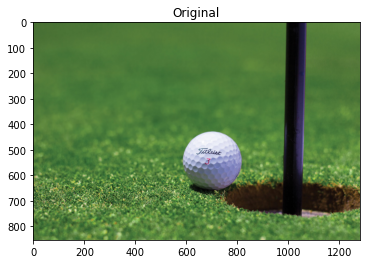

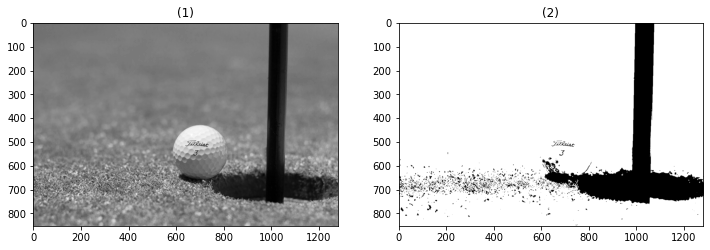

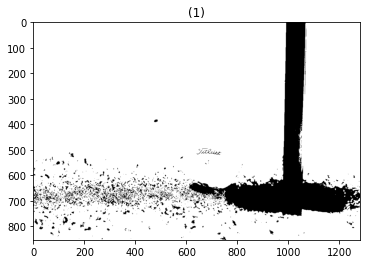

In [42]:
# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf
img = io.imread('imgs/exp1/golf.jpeg')
show_images([img], ['Original'])
img = img.astype(float)


# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
# Green Channel

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
thresholded_green = 1.0*(green > 95)
show_images([green, thresholded_green])
# showHist(green)
# showHist(red)
# showHist(blue)

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold
rgb_sum = (green + red + blue)/3
# rgb_sum = 1.0 * (rgb_sum > 80 and rgb_sum < 120)
for i in range(rgb_sum.shape[0]):
    for j in range(rgb_sum.shape[1]):
        if rgb_sum[i][j] > 70:
            rgb_sum[i][j] = 1
        else:
            rgb_sum[i][j] = 0
# print(rgb_sum)
# 6- display the binarized image
show_images([rgb_sum])





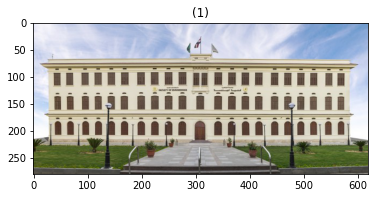

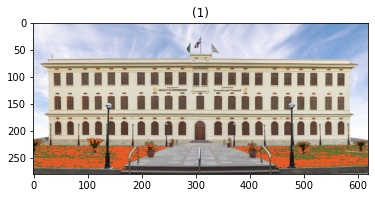

In [50]:
# 1- Get the required RGB color (Using a color picker)
R = 60 
G = 83
B = 23

# 2- Read image
img = io.imread('imgs/exp2/cufe.png')
show_images([img])
# 3- extract R, G and B channels (as float)
red = np.copy(img[:, :, 0]).astype(float)
green = np.copy(img[:, :, 1]).astype(float)
blue = np.copy(img[:, :, 2]).astype(float)

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
red_diff = red - R
green_diff = green - G
blue_diff = blue - B

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
distance = np.sqrt(red_diff**2 + green_diff**2 + blue_diff**2)

# 6-  create a mask by thresholding the differences
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if distance[i][j] < 35:
            img[i][j][0] = 230
            img[i][j][1] = 90
            img[i][j][2] = 40
show_images([img])

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40

# 8- show the image or save it
